# Sujet 1 : Concentration de CO2 dans l'atmosphère depuis 1958

## Présentation du sujet

En 1958, Charles David Keeling  a initié une mesure de la concentration de CO2 dans l'atmosphère à l'observatoire de Mauna Loa, Hawaii, États-Unis qui continue jusqu'à aujourd'hui. L'objectif initial était d'étudier la variation saisonnière, mais l'intérêt s'est déplacé plus tard vers l'étude de la tendance croissante dans le contexte du changement climatique. En honneur à Keeling, ce jeu de données est souvent appelé ["Keeling Curve"](https://fr.wikipedia.org/wiki/Courbe_de_Keeling). L'exploitation des données sera réalisée avec le langage Python 3.

## Chargement des données

In [1]:
# On importe les lib nécessaires au chargement, au traitement et à la présentation des données.
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import isoweek

Les données que nous utilisons pour étudier l'évolution du taux de CO2 dans l'atmosphère sont disponibles sur le [site web de l'institut Scripps](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html)

In [2]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"

In [3]:
# On charge les données disponibles dans le fichier ".csv" (ov enlève l'entête qui fait 54 lignes)
raw_data = pd.read_csv(data_url, skiprows=54, sep = ',')
raw_data

Yr   Mn      Date        Date        CO2  seasonally          fit  \
0                                                  adjusted                
1                  Excel                  [ppm]      [ppm]         [ppm]   
2    1958   01     21200   1958.0411     -99.99      -99.99       -99.99   
3    1958   02     21231   1958.1260     -99.99      -99.99       -99.99   
4    1958   03     21259   1958.2027     315.71      314.43       316.20   
5    1958   04     21290   1958.2877     317.45      315.16       317.30   
6    1958   05     21320   1958.3699     317.51      314.71       317.87   
7    1958   06     21351   1958.4548     -99.99      -99.99       317.25   
8    1958   07     21381   1958.5370     315.86      315.20       315.86   
9    1958   08     21412   1958.6219     314.93      316.20       313.99   
10   1958   09     21443   1958.7068     313.21      316.09       312.46   
11   1958   10     21473   1958.7890     -99.99      -99.99       312.44   
12   1958   11     21504   1958.8740     313.33      315.20       313.61   
13   1958   12     21534   1958.9562     314.67      315.43       314.77   
14   1959   01     21565   1959.0411     315.58      315.54       315.63   
15   1959   02     21596   1959.1260     316.49      315.85       316.28   
16   1959   03     21624   1959.2027     316.65      315.37       316.99   
17   1959   04     21655   1959.2877     317.72      315.42       318.09   
18   1959   05     21685   1959.3699     318.29      315.48       318.66   
19   1959   06     21716   1959.4548     318.15      316.02       318.05   
20   1959   07     21746   1959.5370     316.54      315.87       316.67   
21   1959   08     21777   1959.6219     314.80      316.07       314.82   
22   1959   09     21808   1959.7068     313.84      316.73       313.32   
23   1959   10     21838   1959.7890     313.33      316.33       313.33   
24   1959   11     21869   1959.8740     314.81      316.69       314.54   
25   1959   12     21899   1959.9562     315.58      316.35       315.72   
26   1960   01     21930   1960.0410     316.43      316.39       316.61   
27   1960   02     21961   1960.1257     316.98      316.34       317.28   
28   1960   03     21990   1960.2049     317.58      316.27       318.04   
29   1960   04     22021   1960.2896     319.03      316.70       319.14   
..    ...  ...       ...         ...        ...         ...          ...   
740  2019   07     43661   2019.5370     411.78      410.97       412.29   
741  2019   08     43692   2019.6219     410.01      411.56       410.15   
742  2019   09     43723   2019.7068     408.48      411.98       408.44   
743  2019   10     43753   2019.7890     408.40      412.02       408.57   
744  2019   11     43784   2019.8740     410.16      412.44       410.15   
745  2019   12     43814   2019.9562     411.81      412.74       411.70   
746  2020   01     43845   2020.0410     413.30      413.25       412.90   
747  2020   02     43876   2020.1257     414.05      413.28       413.82   
748  2020   03     43905   2020.2049     414.45      412.87       414.83   
749  2020   04     43936   2020.2896     416.11      413.29       416.28   
750  2020   05     43966   2020.3716     417.15      413.74       417.05   
751  2020   06     43997   2020.4563     416.29      413.73       416.38   
752  2020   07     44027   2020.5383     414.42      413.64       414.79   
753  2020   08     44058   2020.6230     412.52      414.10       412.63   
754  2020   09     44089   2020.7077     411.18      414.70       410.91   
755  2020   10     44119   2020.7896     411.12      414.75       411.02   
756  2020   11     44150   2020.8743     412.88      415.16       412.57   
757  2020   12     44180   2020.9563     413.89      414.82       414.08   
758  2021   01     44211   2021.0411     415.15      415.10       415.22   
759  2021   02     44242   2021.1260     416.47      415.70       416.10   
760  2021   03     44270   2021.2027     417.16      41

## Utilisation et mise en forme des données

- Nous l'exploitation des données numériques, nous décidons d'enlever les lignes 0 et 1 car elles contiennent seulement des informations textuelles, ou des unités de mesure. On retiendra le point important qui est l'unité utilisée pour exprimer les quantités de CO2 : le ppm ou partie par million.

- Pour ce qui est des dates, on garde uniquement les colonnes associées au mois (Mn) et à l'année (Yr) de la mesure. 

- De plus, on garde seulement les premières colonnes appelées "CO2" et "seasonally" puisqu'elles correspondent aux données non lissées. Les données "CO2" sont les données brutes et les données "seasonally" corresondent aux données brutes auqelles on a soustrait les variations saisonières. 

- Finalement, il faut enlever les espaces inutiles dans le nom des colonnes qui gènent le dépouillement. 

In [4]:
# On enlève les deux premières lignes
num_data = raw_data[2:]
# On supprime les deux colonnes de données "Date"
num_data = num_data.drop(num_data.columns[[2,3,6,7,8,9]], axis=1).copy()
# On enlève les espaces pour le nom des colonnes
new_columns = [y.replace(" ","") for y in num_data.columns]
num_data.columns = new_columns
num_data


Yr   Mn        CO2 seasonally
2    1958   01     -99.99     -99.99
3    1958   02     -99.99     -99.99
4    1958   03     315.71     314.43
5    1958   04     317.45     315.16
6    1958   05     317.51     314.71
7    1958   06     -99.99     -99.99
8    1958   07     315.86     315.20
9    1958   08     314.93     316.20
10   1958   09     313.21     316.09
11   1958   10     -99.99     -99.99
12   1958   11     313.33     315.20
13   1958   12     314.67     315.43
14   1959   01     315.58     315.54
15   1959   02     316.49     315.85
16   1959   03     316.65     315.37
17   1959   04     317.72     315.42
18   1959   05     318.29     315.48
19   1959   06     318.15     316.02
20   1959   07     316.54     315.87
21   1959   08     314.80     316.07
22   1959   09     313.84     316.73
23   1959   10     313.33     316.33
24   1959   11     314.81     316.69
25   1959   12     315.58     316.35
26   1960   01     316.43     316.39
27   1960   02     316.98     316.34
28   1960   03     317.58     316.27
29   1960   04     319.03     316.70
30   1960   05     320.03     317.22
31   1960   06     319.59     317.47
..    ...  ...        ...        ...
740  2019   07     411.78     410.97
741  2019   08     410.01     411.56
742  2019   09     408.48     411.98
743  2019   10     408.40     412.02
744  2019   11     410.16     412.44
745  2019   12     411.81     412.74
746  2020   01     413.30     413.25
747  2020   02     414.05     413.28
748  2020   03     414.45     412.87
749  2020   04     416.11     413.29
750  2020   05     417.15     413.74
751  2020   06     416.29     413.73
752  2020   07     414.42     413.64
753  2020   08     412.52     414.10
754  2020   09     411.18     414.70
755  2020   10     411.12     414.75
756  2020   11     412.88     415.16
757  2020   12     413.89     414.82
758  2021   01     415.15     415.10
759  2021   02     416.47     415.70
760  2021   03     417.16     415.61
761  2021   04     418.24     415.44
762  2021   05     418.95     415.53
763  2021   06     418.70     416.11
764  2021   07     416.65     415.84
765  2021   08     414.34     415.90
766  2021   09     412.90     416.42
767  2021   10     -99.99     -99.99
768  2021   11     -99.99     -99.99
769  2021   12     -99.99     -99.99

[768 rows x 4 columns]

A partir des colonnes Yr (année) et Mn (mois), on construit la colonne période au format approprié pour la représentation graphique des mesures.

In [5]:
# Avec isoweek, on définit une période pour chaque date de mesure.

final_data = num_data.copy()

ind_min = min(final_data.index)
ind_max = max(final_data.index)


final_data['period'] = [pd.Period(freq ='M', year=int(final_data['Yr'][k]), month=int(final_data['Mn'][k])) for k in range(ind_min, ind_max+1)]
final_data

Yr   Mn        CO2 seasonally  period
2    1958   01     -99.99     -99.99 1958-01
3    1958   02     -99.99     -99.99 1958-02
4    1958   03     315.71     314.43 1958-03
5    1958   04     317.45     315.16 1958-04
6    1958   05     317.51     314.71 1958-05
7    1958   06     -99.99     -99.99 1958-06
8    1958   07     315.86     315.20 1958-07
9    1958   08     314.93     316.20 1958-08
10   1958   09     313.21     316.09 1958-09
11   1958   10     -99.99     -99.99 1958-10
12   1958   11     313.33     315.20 1958-11
13   1958   12     314.67     315.43 1958-12
14   1959   01     315.58     315.54 1959-01
15   1959   02     316.49     315.85 1959-02
16   1959   03     316.65     315.37 1959-03
17   1959   04     317.72     315.42 1959-04
18   1959   05     318.29     315.48 1959-05
19   1959   06     318.15     316.02 1959-06
20   1959   07     316.54     315.87 1959-07
21   1959   08     314.80     316.07 1959-08
22   1959   09     313.84     316.73 1959-09
23   1959   10     313.33     316.33 1959-10
24   1959   11     314.81     316.69 1959-11
25   1959   12     315.58     316.35 1959-12
26   1960   01     316.43     316.39 1960-01
27   1960   02     316.98     316.34 1960-02
28   1960   03     317.58     316.27 1960-03
29   1960   04     319.03     316.70 1960-04
30   1960   05     320.03     317.22 1960-05
31   1960   06     319.59     317.47 1960-06
..    ...  ...        ...        ...     ...
740  2019   07     411.78     410.97 2019-07
741  2019   08     410.01     411.56 2019-08
742  2019   09     408.48     411.98 2019-09
743  2019   10     408.40     412.02 2019-10
744  2019   11     410.16     412.44 2019-11
745  2019   12     411.81     412.74 2019-12
746  2020   01     413.30     413.25 2020-01
747  2020   02     414.05     413.28 2020-02
748  2020   03     414.45     412.87 2020-03
749  2020   04     416.11     413.29 2020-04
750  2020   05     417.15     413.74 2020-05
751  2020   06     416.29     413.73 2020-06
752  2020   07     414.42     413.64 2020-07
753  2020   08     412.52     414.10 2020-08
754  2020   09     411.18     414.70 2020-09
755  2020   10     411.12     414.75 2020-10
756  2020   11     412.88     415.16 2020-11
757  2020   12     413.89     414.82 2020-12
758  2021   01     415.15     415.10 2021-01
759  2021   02     416.47     415.70 2021-02
760  2021   03     417.16     415.61 2021-03
761  2021   04     418.24     415.44 2021-04
762  2021   05     418.95     415.53 2021-05
763  2021   06     418.70     416.11 2021-06
764  2021   07     416.65     415.84 2021-07
765  2021   08     414.34     415.90 2021-08
766  2021   09     412.90     416.42 2021-09
767  2021   10     -99.99     -99.99 2021-10
768  2021   11     -99.99     -99.99 2021-11
769  2021   12     -99.99     -99.99 2021-12

[768 rows x 5 columns]

In [6]:
final_data = final_data.set_index('period').sort_index()
final_data

Yr   Mn        CO2 seasonally
period                                  
1958-01  1958   01     -99.99     -99.99
1958-02  1958   02     -99.99     -99.99
1958-03  1958   03     315.71     314.43
1958-04  1958   04     317.45     315.16
1958-05  1958   05     317.51     314.71
1958-06  1958   06     -99.99     -99.99
1958-07  1958   07     315.86     315.20
1958-08  1958   08     314.93     316.20
1958-09  1958   09     313.21     316.09
1958-10  1958   10     -99.99     -99.99
1958-11  1958   11     313.33     315.20
1958-12  1958   12     314.67     315.43
1959-01  1959   01     315.58     315.54
1959-02  1959   02     316.49     315.85
1959-03  1959   03     316.65     315.37
1959-04  1959   04     317.72     315.42
1959-05  1959   05     318.29     315.48
1959-06  1959   06     318.15     316.02
1959-07  1959   07     316.54     315.87
1959-08  1959   08     314.80     316.07
1959-09  1959   09     313.84     316.73
1959-10  1959   10     313.33     316.33
1959-11  1959   11     314.81     316.69
1959-12  1959   12     315.58     316.35
1960-01  1960   01     316.43     316.39
1960-02  1960   02     316.98     316.34
1960-03  1960   03     317.58     316.27
1960-04  1960   04     319.03     316.70
1960-05  1960   05     320.03     317.22
1960-06  1960   06     319.59     317.47
...       ...  ...        ...        ...
2019-07  2019   07     411.78     410.97
2019-08  2019   08     410.01     411.56
2019-09  2019   09     408.48     411.98
2019-10  2019   10     408.40     412.02
2019-11  2019   11     410.16     412.44
2019-12  2019   12     411.81     412.74
2020-01  2020   01     413.30     413.25
2020-02  2020   02     414.05     413.28
2020-03  2020   03     414.45     412.87
2020-04  2020   04     416.11     413.29
2020-05  2020   05     417.15     413.74
2020-06  2020   06     416.29     413.73
2020-07  2020   07     414.42     413.64
2020-08  2020   08     412.52     414.10
2020-09  2020   09     411.18     414.70
2020-10  2020   10     411.12     414.75
2020-11  2020   11     412.88     415.16
2020-12  2020   12     413.89     414.82
2021-01  2021   01     415.15     415.10
2021-02  2021   02     416.47     415.70
2021-03  2021   03     417.16     415.61
2021-04  2021   04     418.24     415.44
2021-05  2021   05     418.95     415.53
2021-06  2021   06     418.70     416.11
2021-07  2021   07     416.65     415.84
2021-08  2021   08     414.34     415.90
2021-09  2021   09     412.90     416.42
2021-10  2021   10     -99.99     -99.99
2021-11  2021   11     -99.99     -99.99
2021-12  2021   12     -99.99     -99.99

[768 rows x 4 columns]

In [7]:
for k in [2,3]:
    final_data[final_data.columns[k]] = final_data[final_data.columns[k]].astype(float) 
final_data.drop( final_data[ final_data['CO2'] <0 ].index, inplace=True)
final_data.drop( final_data[ final_data['seasonally'] <0 ].index, inplace=True)

## Présentation graphique des données

Cette section présente les variations brutes de CO2 mesurées, ainsi que les mêmes données corrigées des variations saisonières.

- On observe une tendance globale à la hausse de la quantité de CO2 dans l'atmosphère
- On observe des variations saisonières autour de cette tendance globale

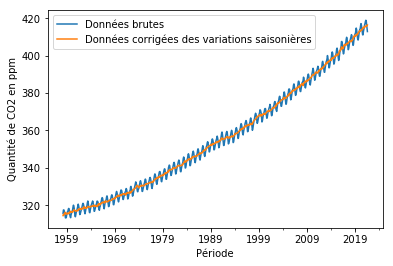

In [8]:
final_data['CO2'].plot(label = 'Données brutes')
final_data['seasonally'].plot(label = 'Données corrigées des variations saisonières')
plt.xlabel('Période')
plt.ylabel('Quantité de CO2 en ppm')
plt.legend()

## Caractérisation de la période des oscillations

On cherche à caractériser la période de ces oscillations. Pour ce faire, on divise les données CO2 brutes par les données corrigées des variations saisonières. 

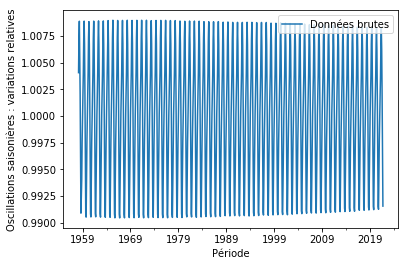

In [9]:
oscillations = final_data['CO2']/final_data['seasonally']
oscillations.plot(label = 'Données brutes')
plt.xlabel('Période')
plt.ylabel('Oscillations saisonières : variations relatives')
plt.legend()

On peut estimer la période caractéristiques des variations saisonières

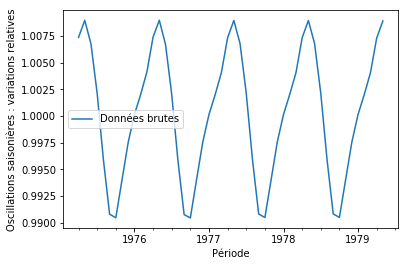

In [10]:
oscillations = final_data['CO2']/final_data['seasonally']
oscillations[200:250].plot(label = 'Données brutes')
plt.xlabel('Période')
plt.ylabel('Oscillations saisonières : variations relatives')
plt.legend()

On observe que la période des oscillations est de <strong>1 an</strong>, ce qui est cohérent avec le côté saisonier de ces variations. Une analyse par transformée de Fourier Rapide (FFT) permettrait d'identifier plus précisément cette période. Nous considérons qu'un analyse visuelle suffit en premier lieu.